In [1]:
import nltk
import numpy as np
import pandas as pd
from PyPDF2 import PdfReader
import os
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize
import time ,re , timeit ,os
from datetime import datetime

In [2]:
# 소수점 이하 세자리 까지 출력.
np.set_printoptions(precision=3)
pd.set_option('display.precision',3)

# 데이터 프레임 가로 방향으로 최대로 보여준다.
pd.set_option('expand_frame_repr', False)

In [3]:
# 제목에 ai가 들어간 논문 180개 병합하여 읽어오기
reader1 = PdfReader(r"../data/ai_merged1.pdf")
reader2 = PdfReader(r"../data/ai_merged2.pdf")
reader3 = PdfReader(r"../data/ai_merged3.pdf")
reader4 = PdfReader(r"../data/ai_merged4.pdf")
reader5 = PdfReader(r"../data/ai_merged5.pdf")

In [4]:
text_all1 = []
text_all2 = []
text_all3 = []
text_all4 = []
text_all5 = []

for page in reader1.pages:
    text = page.extract_text()
    text_all1.append(text)
for page in reader2.pages:
    text = page.extract_text()
    text_all2.append(text)
for page in reader3.pages:
    text = page.extract_text()
    text_all3.append(text)
for page in reader4.pages:
    text = page.extract_text()
    text_all4.append(text)
for page in reader5.pages:
    text = page.extract_text()
    text_all5.append(text)

FloatObject (b'0.00-10') invalid; use 0.0 instead
FloatObject (b'0.00-10') invalid; use 0.0 instead
FloatObject (b'0.00000-26246718') invalid; use 0.0 instead
C:\Users\1104-10\anaconda3\Lib\site-packages\PyPDF2\_cmap.py:151: PdfReadWarning: Advanced encoding [] not implemented yet
  warnings.warn(


In [5]:
# 간단한 전처리.
text_all1 = [x.lower() for x in text_all1]
text_all2 = [x.lower() for x in text_all2]
text_all3 = [x.lower() for x in text_all3]
text_all4 = [x.lower() for x in text_all4]
text_all5 = [x.lower() for x in text_all5]

In [6]:
text = text_all1 + text_all2 + text_all3 + text_all4 + text_all5

In [7]:
text

["special section on deep learning\nalgorithms for internet of medical things\nreceived april 21, 2020, accepted april 27, 2020, date of publication may 4, 2020, date of current version may 26, 2020.\ndigital object identifier 10.1 109/access.2020.2992341\na comprehensive review of the\ncovid-19 pandemic and the role of iot,\ndrones, ai, blockchain, and 5g in\nmanaging its impact\nvinay chamola\n1, vikas hassija\n2, vatsal gupta\n2,\nand mohsen guizani\n3, (fellow, ieee)\n1department of electrical and electronics engineering, birla institute of technology and science (bits), pilani 333031, india\n2department of cse and it, jaypee institute of information technology, noida 201309, india\n3department of computer science and engineering, qatar university, doha, qatar\ncorresponding author: mohsen guizani (mguizani@ieee.org)\nthis work was supported by the qatar national research fund (a member of the qatar foundation) under grant nprp10-1205-160012.\nabstract the unprecedented outbreak of

In [8]:
text = ''.join(text)
text = re.sub(",|\n|@|:", "", text) # 쉼표, \n, @ 제거
text = re.sub(r'\([^)]*\)', '', text) # 소괄호 제거
text = sent_tokenize(text)

In [9]:
t = []
for a_sentence in text:
    a_sentence = re.sub(r'\W',' ',a_sentence)            # 특수 문자는 space로 대체.
    a_sentence = re.sub(r'\d', '', a_sentence)
    a_sentence = re.sub(r'\s+',' ',a_sentence)           # 잉여 space 제거.
    t.append(a_sentence)
while ' ' in t[:]:
    t.remove(' ')

In [10]:
text = t
text

['special section on deep learningalgorithms for internet of medical thingsreceived april accepted april date of publication may date of current version may digital object identifier access a comprehensive review of thecovid pandemic and the role of iotdrones ai blockchain and g inmanaging its impactvinay chamola vikas hassija vatsal guptaand mohsen guizani department of electrical and electronics engineering birla institute of technology and science pilani indiadepartment of cse and it jaypee institute of information technology noida indiadepartment of computer science and engineering qatar university doha qatarcorresponding author mohsen guizani this work was supported by the qatar national research fund under grant nprp abstract the unprecedented outbreak of the novel coronavirus termed as covid by the worldhealth organization has placed numerous governments around the world in a precarious position the impact of the covid outbreak earlier witnessed by the citizens of china alone ha

In [11]:
test = pd.DataFrame({'sentence':text})
test['num'] = pd.DataFrame(range(len(test)))
test

,sentence,num
0,special section on deep learningalgorithms for...,0
1,the scarcity of resources to endure thecovid o...,1
2,the number of laboratory con rmed coronavirusc...,2
3,in response to such acts we draw on various re...,3
4,in addition to the direct health implications ...,4
...,...,...
80240,intangible assets and growth ac counting evid...,80240
80241,it is beautifully written extremely interestin...,80241
80242,the authors make two central claims,80242
80243,the ﬁ rst is that ai rebecca henderson is the ...,80243


In [12]:
for i in range(len(test)):
    if len(test['sentence'][i])< 80:
        test.drop([i], axis=0, inplace=True)

In [13]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import RegexpTokenizer

In [14]:
def nltk_tokenizer(_wd):
    return RegexpTokenizer(r'\w+').tokenize(_wd.lower())

test['words'] = test['sentence'].apply(nltk_tokenizer)
test

,sentence,num,words
0,special section on deep learningalgorithms for...,0,"[special, section, on, deep, learningalgorithm..."
1,the scarcity of resources to endure thecovid o...,1,"[the, scarcity, of, resources, to, endure, the..."
2,the number of laboratory con rmed coronavirusc...,2,"[the, number, of, laboratory, con, rmed, coron..."
3,in response to such acts we draw on various re...,3,"[in, response, to, such, acts, we, draw, on, v..."
4,in addition to the direct health implications ...,4,"[in, addition, to, the, direct, health, implic..."
...,...,...,...
80239,challenges to mismeasurement explanations for...,80239,"[challenges, to, mismeasurement, explanations,..."
80240,intangible assets and growth ac counting evid...,80240,"[intangible, assets, and, growth, ac, counting..."
80241,it is beautifully written extremely interestin...,80241,"[it, is, beautifully, written, extremely, inte..."
80243,the ﬁ rst is that ai rebecca henderson is the ...,80243,"[the, ﬁ, rst, is, that, ai, rebecca, henderson..."


In [15]:
# 읽어온 파일 csv로 저장 (나중에 실행할 때 이 파일만 불러오면 됨)
test.to_csv('test.csv')

In [18]:
tokens = [ t for d in test['words'] for t in d]
text = nltk.Text(tokens, name='AI_assay')
print(len(text.tokens))
print(len(set(text.tokens)))

1431078
91320


In [19]:
# 최다 빈도 단어 확인
print(text.vocab().most_common(10))

[('the', 72364), ('of', 48799), ('and', 42843), ('to', 32648), ('in', 28501), ('a', 27257), ('for', 16310), ('is', 15148), ('that', 13429), ('ai', 12011)]


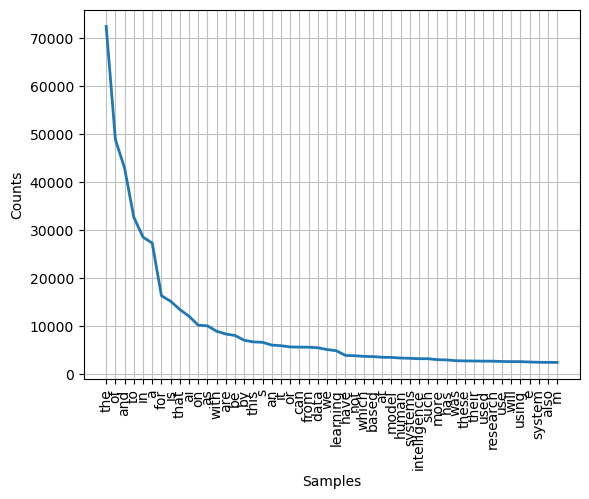

<Axes: xlabel='Samples', ylabel='Counts'>

In [20]:
# 단어 빈도 수 확인
text.plot(50)

In [21]:
lower_cnt = int(len(set(text.tokens)) * 0.01) * -1
print(text.vocab().most_common()[:lower_cnt:-1])

[('mcarthur', 1), ('natty', 1), ('beautifully', 1), ('fabulous', 1), ('guvenen', 1), ('bloombergview', 1), ('dimitriadis', 1), ('audhkhasi', 1), ('sercu', 1), ('kurata', 1), ('saon', 1), ('improvising', 1), ('orlikowski', 1), ('frbp', 1), ('milgrom', 1), ('dewhurst', 1), ('willmott', 1), ('katy', 1), ('populism', 1), ('levitt', 1), ('visuomotor', 1), ('kendrick', 1), ('durlauf', 1), ('boyan', 1), ('tug', 1), ('hortaçsu', 1), ('microeconomics', 1), ('switchover', 1), ('photolithographic', 1), ('underinvestment', 1), ('hatzius', 1), ('ruhl', 1), ('rassier', 1), ('mataloni', 1), ('syversonguvenen', 1), ('grangier', 1), ('auli', 1), ('gehring', 1), ('centennial', 1), ('vlad', 1), ('menick', 1), ('piot', 1), ('bilal', 1), ('azar', 1), ('gheshlaghi', 1), ('meire', 1), ('bk', 1), ('feldstein', 1), ('dynamo', 1), ('imf', 1), ('lusine', 1), ('hbswk', 1), ('bpea', 1), ('villones', 1), ('lal', 1), ('bridgman', 1), ('robocalypse', 1), ('salomons', 1), ('syversoneconomy', 1), ('curvetime', 1), ('in

In [22]:
doc_test = test[['num','words']].values.tolist()

In [23]:
tagged_data = [TaggedDocument(words=_d, tags=[uid]) for uid, _d in doc_test]

In [24]:
tagged_data[0]

TaggedDocument(words=['special', 'section', 'on', 'deep', 'learningalgorithms', 'for', 'internet', 'of', 'medical', 'thingsreceived', 'april', 'accepted', 'april', 'date', 'of', 'publication', 'may', 'date', 'of', 'current', 'version', 'may', 'digital', 'object', 'identifier', 'access', 'a', 'comprehensive', 'review', 'of', 'thecovid', 'pandemic', 'and', 'the', 'role', 'of', 'iotdrones', 'ai', 'blockchain', 'and', 'g', 'inmanaging', 'its', 'impactvinay', 'chamola', 'vikas', 'hassija', 'vatsal', 'guptaand', 'mohsen', 'guizani', 'department', 'of', 'electrical', 'and', 'electronics', 'engineering', 'birla', 'institute', 'of', 'technology', 'and', 'science', 'pilani', 'indiadepartment', 'of', 'cse', 'and', 'it', 'jaypee', 'institute', 'of', 'information', 'technology', 'noida', 'indiadepartment', 'of', 'computer', 'science', 'and', 'engineering', 'qatar', 'university', 'doha', 'qatarcorresponding', 'author', 'mohsen', 'guizani', 'this', 'work', 'was', 'supported', 'by', 'the', 'qatar', 'n

In [25]:
# doc2vec 하이퍼 파라미터 튜닝
max_epochs = 11

model = Doc2Vec(
    window=5,                # 문맥을 고려하는 단어의 최대 거리
    vector_size=130,         # 벡터 크기
    alpha=0.025,             # 모델의 학습속도
    min_alpha=0.025,
    workers = 8,             # 학습을 병렬화하기 위한 스레드 수
    min_count=3,             # 최소 단어 빈도
    dm =0,                   # dm = '0': DBOW // dm = '1': DM
    negative = 6,            # 음수 에제의 수를 결정
    seed = 9999)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    model.alpha -= 0.002     # 학습 속도 점차 감소시킴
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
Model Saved


In [26]:
# 비슷한 단어 테스트
model.wv.most_similar('korea',topn=10)

[('dubai', 0.3454352617263794),
 ('israel', 0.34018829464912415),
 ('hero', 0.33700981736183167),
 ('thealgorithms', 0.32803624868392944),
 ('mutate', 0.32234182953834534),
 ('labo', 0.31641167402267456),
 ('ofknowledge', 0.31562456488609314),
 ('strained', 0.3100779056549072),
 ('finnis', 0.30814531445503235),
 ('hca', 0.3062429130077362)]

In [28]:
# 특정 문장 출력
test_id = 20
test['num'][test_id], test['sentence'][test_id]

(20,
 'the past twodecades have witnessed the emergence of several viral out breaks with different forms of coronavirus at the helmsuch as the sars cov outbreak and themore recent middle east respiratory syndrome coronavirus infection of the sars cov outbreakoriginated in the guandong province of china and laterspread to more than countries worldwide causing over infections and around deaths ')

In [29]:
# 특정 문장에 대한 유사한 문장 출력
model.random.seed(9999)

doc_list = test['words'][test_id]

inferred_vector = model.infer_vector(doc_list)
return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=5)

for rd in return_docs:
    for des in test[test['num'] == rd[0]]['sentence']:
        print (rd[0],rd[1],'\n',des,'\n')

20 0.9361479878425598 
 the past twodecades have witnessed the emergence of several viral out breaks with different forms of coronavirus at the helmsuch as the sars cov outbreak and themore recent middle east respiratory syndrome coronavirus infection of the sars cov outbreakoriginated in the guandong province of china and laterspread to more than countries worldwide causing over infections and around deaths  

449 0.6491448283195496 
 voice detectionfollowing the covid outbreak several voice detectionapps have been developed for covid screening  

289 0.6453151702880859 
 screening massesfollowing the outbreak of the covid several authoritiesin china committed themselves to detect covid patientsas soon as possible  

109 0.622896671295166 
 comprehensive review of the covid pandemicfigure countries in lockdown as of april c  

79 0.6227855682373047 
 while coronaviruses such as sars cov mers cov have been responsible for a majority of theseoutbreaks different types of in uenzaviruses 

C:\Users\1104-10\AppData\Local\Temp\ipykernel_15912\3435780723.py:6: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=5)


In [30]:
# 직접 입력한 문장과 유사한 문장 출력
model.random.seed(9999)

doc_list = 'the business of artificial intelligence'.split(' ')

inferred_vector = model.infer_vector(doc_list)
return_docs = model.dv.most_similar(positive=[inferred_vector],topn=5)

for rd in return_docs:
    for des in test[test['num'] == rd[0]]['sentence']:
        print (rd[0],rd[1],'\n',des,'\n')

12533 0.7482085227966309 
 on the interpretations illustrations and implications of artificial intelligence business horizons  

10802 0.7280052900314331 
 strategic council for ai technology artificial intelligence technology strategy  

7007 0.7255040407180786 
 hbr org the big idea artificial intelligence for real erik brynjolfsson and andrew mcafeesolving for  

52828 0.7233378291130066 
  executive office of the president artificial intelligence automation and the economy  

54237 0.71969074010849 
 developing an artificial intelligence capability a theoretical framework for business value  

